In [43]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from plot_utils import plot_event_history

In [44]:
sns.set_style("whitegrid")

In [45]:
mab_log = pd.read_csv("mab_log.csv")
mab_arms = pd.read_csv("mab_arms.csv")
event_history = pd.read_csv("event_history.csv", index_col=False).dropna().sort_values(by="event")
quit_sold = event_history.loc[event_history.event.isin(["quit", "sold"])]

In [ ]:
quit_sold.loc[event_history.run_id == 1].groupby(["actual_group", "predicted_group"]).agg(
    count=("run_id", "count"),
)

In [ ]:
event_history.loc[event_history.run_id == 1].groupby(["actual_group", "predicted_group", "event"]).agg(
    count=("run_id", "count"),
)

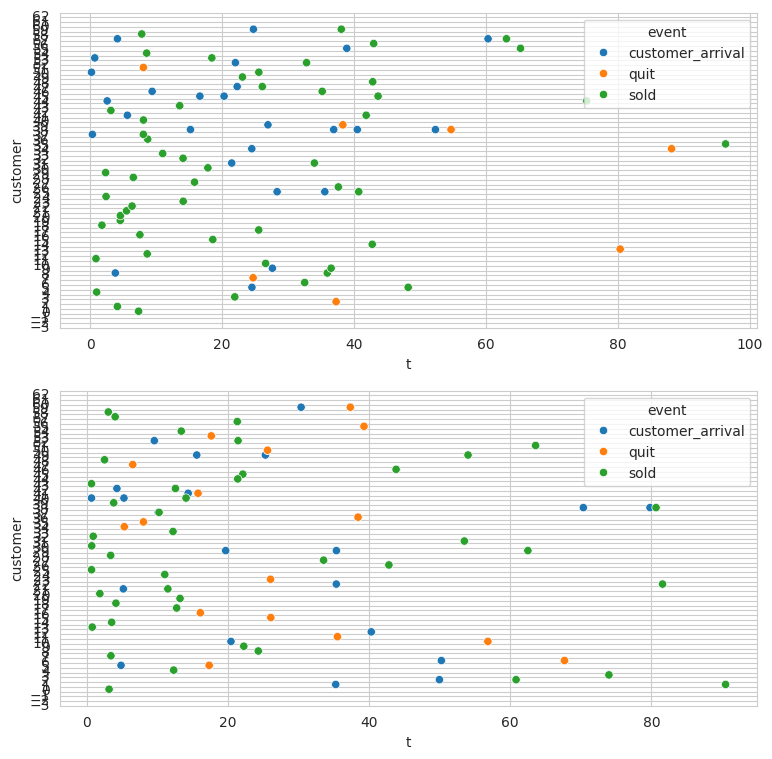

In [46]:
fig, axs = plt.subplots(2,1, figsize=(9, 9))
plot_event_history(axs[0], event_history.loc[event_history.run_id == 0])
plot_event_history(axs[1], event_history.loc[event_history.run_id == 3])

<Axes: xlabel='t', ylabel='price'>

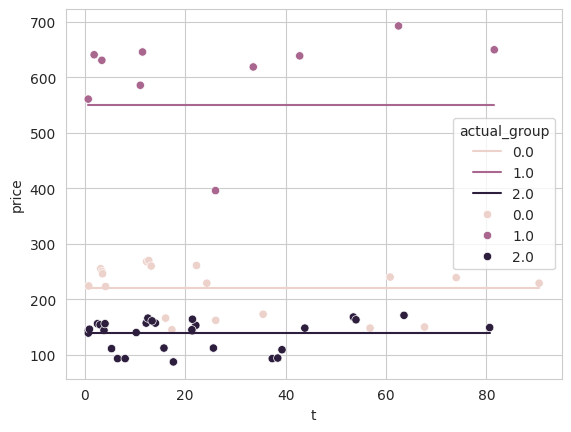

In [72]:
sns.lineplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="t",
    y="price",
    hue="actual_group"
)
sns.scatterplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="t",
    y="adjusted_wtp",
    hue="actual_group",
    # shape='event'
)

<Axes: xlabel='customer', ylabel='price'>

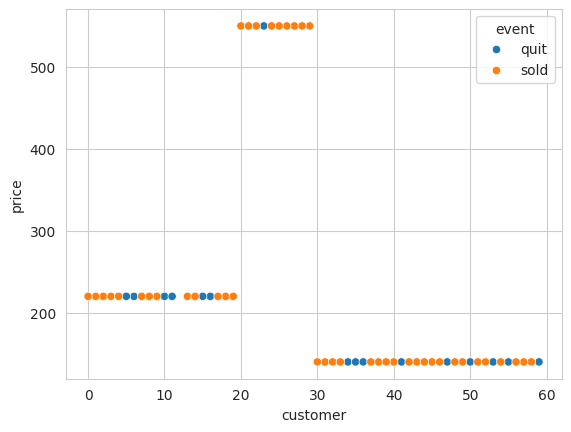

In [74]:
sns.scatterplot(
    data=quit_sold.loc[event_history.run_id == 3],
    x="customer",
    y="price",
    hue="event",
    # shape='event'
)

In [51]:
event_history

,run_id,t,event,customer,customer_wtp,customer_max_wtp,adjusted_wtp,actual_group,predicted_group,price,irp,erp,rp,loss_aversion
206,4.0,13.782712,customer_arrival,21.0,501.0,1003.0,501.0,1.0,1.0,0.0,501.0,501.0,501.0,2.25
351,0.0,26.117540,customer_arrival,47.0,127.0,254.0,165.0,2.0,2.0,168.0,127.0,127.0,127.0,2.25
183,4.0,10.175982,customer_arrival,4.0,191.0,383.0,191.0,0.0,0.0,0.0,191.0,191.0,191.0,2.25
184,4.0,10.545321,customer_arrival,40.0,124.0,249.0,124.0,2.0,2.0,0.0,124.0,124.0,124.0,2.25
186,4.0,10.613208,customer_arrival,4.0,191.0,383.0,197.0,0.0,0.0,200.0,191.0,191.0,191.0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,4.0,21.857680,sold,53.0,133.0,266.0,170.0,2.0,2.0,125.0,133.0,133.0,133.0,2.25
221,4.0,23.440582,sold,20.0,492.0,985.0,615.0,1.0,1.0,500.0,492.0,492.0,492.0,2.25
223,4.0,24.825940,sold,42.0,127.0,254.0,131.0,2.0,2.0,125.0,127.0,127.0,127.0,2.25
231,4.0,31.094763,sold,28.0,500.0,1001.0,596.0,1.0,1.0,500.0,500.0,500.0,500.0,2.25


In [30]:
mab_res = mab_log.groupby(["config_id", "run_id"]).agg(
    total_reward=('reward', 'sum'),
).reset_index()

In [32]:
mab_res["Clustering Accuracy"] = mab_res.config_id.replace(0, "high").replace(1, "low")

<Axes: xlabel='run_id', ylabel='total_reward'>

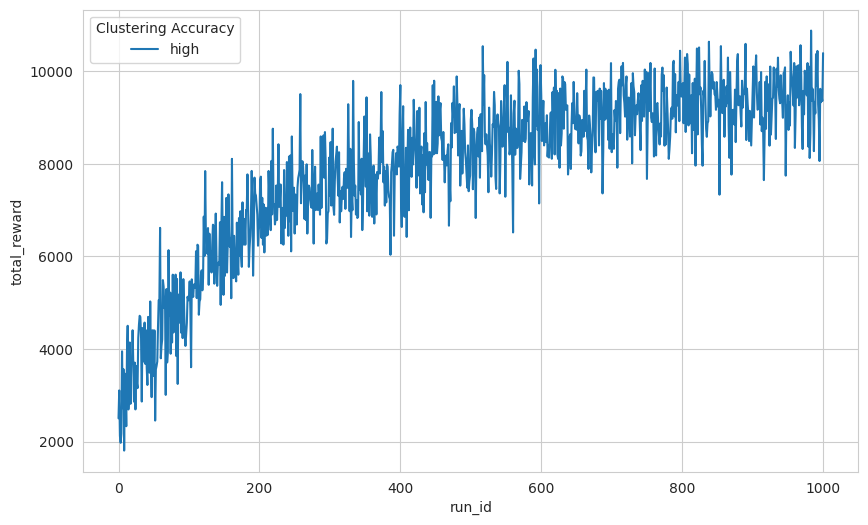

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(
    x="run_id",
    y="total_reward",
    data=mab_res,
    hue="Clustering Accuracy",
)

Text(0, 0.5, 'Best Price')

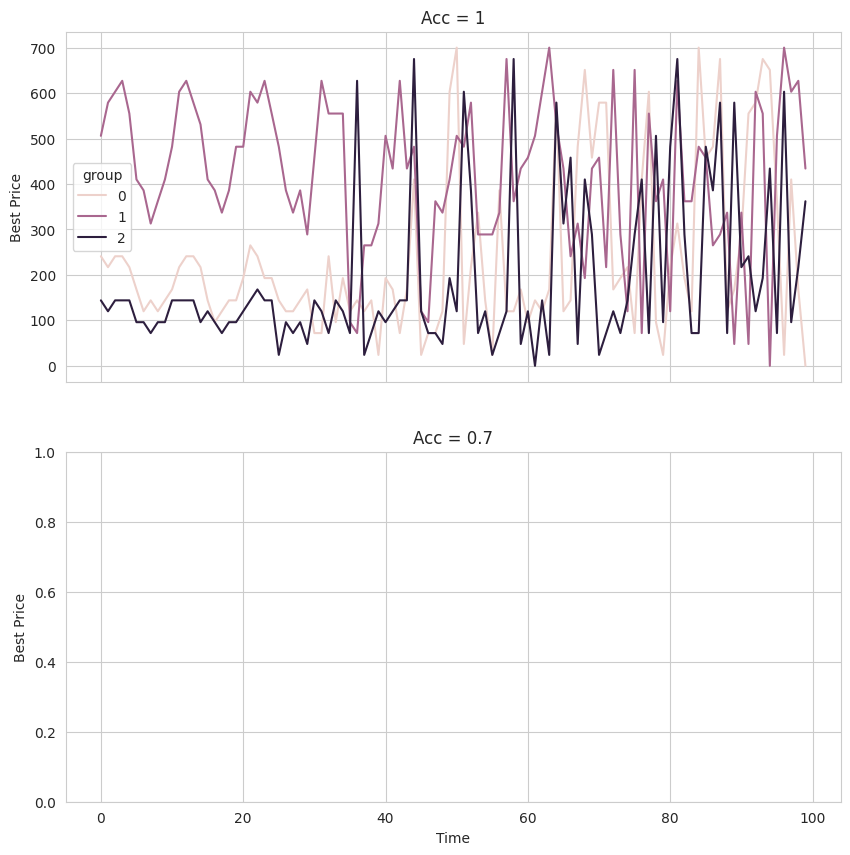

In [42]:
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 0],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[0],
)
sns.lineplot(
    data=mab_arms.loc[mab_arms.run_id == 1],
    x="t",
    y="best_price",
    hue="group",
    ax=axs[1],
)
axs[0].set_title("Acc = 1")
axs[1].set_title("Acc = 0.7")
axs[1].set_xlabel("Time")
axs[0].set_ylabel("Best Price")
axs[1].set_ylabel("Best Price")